<a href="https://colab.research.google.com/github/vglykos/NLP/blob/main/Count_Vectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [2]:
#download the data we need for the nltk
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
#The goal of this dataset is to classify the bbc documents

--2022-12-12 15:07:21--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  15.6MB/s    in 0.3s    

2022-12-12 15:07:22 (15.6 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [4]:
df=pd.read_csv("bbc_text_cls.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [6]:
df.head(10)

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
5,Japan narrowly escapes recession\n\nJapan's ec...,business
6,Jobs growth still slow in the US\n\nThe US cre...,business
7,"India calls for fair trade rules\n\nIndia, whi...",business
8,Ethiopia's crop production up 24%\n\nEthiopia ...,business
9,Court rejects $280bn tobacco case\n\nA US gove...,business


In [7]:
df.tail(10)

,text,labels
2215,Broadband fuels online expression\n\nFast web ...,tech
2216,Savvy searchers fail to spot ads\n\nInternet s...,tech
2217,TV's future down the phone line\n\nInternet TV...,tech
2218,Cebit fever takes over Hanover\n\nThousands of...,tech
2219,New consoles promise big problems\n\nMaking ga...,tech
2220,BT program to beat dialler scams\n\nBT is intr...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech
2222,Be careful how you code\n\nA new European dire...,tech
2223,US cyber security chief resigns\n\nThe man mak...,tech
2224,Losing yourself in online gaming\n\nOnline rol...,tech


In [8]:
inputs= df.text
labels=df.labels

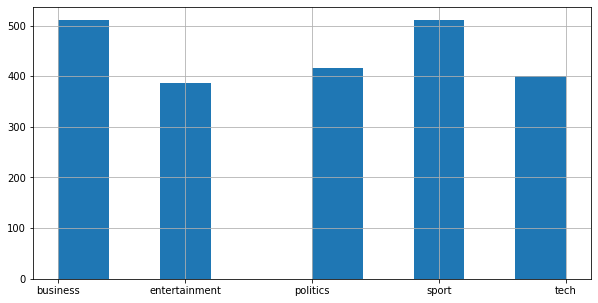

In [9]:
#Lets check if we have imbalanced classes (over- or under-represented classes)
labels.hist(figsize=(10,5)); #interesting. I do not need to import matplotlib

In [10]:
#Before the CountVectorizer we do train_test _split

inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state=123)
Ytest

717     entertainment
798     entertainment
1330            sport
18           business
1391            sport
            ...      
1636            sport
1422            sport
1982             tech
2005             tech
550     entertainment
Name: labels, Length: 557, dtype: object

In [11]:
vectorizer= CountVectorizer() #simple. no args. default values

In [12]:
Xtrain= vectorizer.fit_transform(inputs_train) # fit_transform train set
Xtest= vectorizer.transform(inputs_test) # transform test set
Xtrain

<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

In [13]:
np.prod(Xtrain.shape) #the total number of elements composing the sparse matrix

43846716

In [14]:
(Xtrain != 0).sum() #the total number of non-zero elements in the sparse matrix

337411

In [15]:
print("pecentage of non-zero elements in the sparse matrix: {:.4f}".format((Xtrain != 0).sum() / np.prod(Xtrain.shape)))

pecentage of non-zero elements in the sparse matrix: 0.0077


In [16]:
model= MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score: {}" .format(model.score(Xtrain, Ytrain)))
print("test score: {}" .format(model.score(Xtest, Ytest)))
#good score but lets see if we can improve it

train score: 0.9922062350119905
test score: 0.9712746858168761


In [17]:
#with stopwords
vectorizer= CountVectorizer(stop_words="english")

Xtrain= vectorizer.fit_transform(inputs_train)
Xtest= vectorizer.transform(inputs_test)

model= MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score: {}" .format(model.score(Xtrain, Ytrain)))
print("test score: {}" .format(model.score(Xtest, Ytest)))

train score: 0.9928057553956835
test score: 0.9766606822262118


In [18]:
#Lemmatization
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith("J"):
        return wordnet.ADJ
    elif treebank_tag.startswith("V"):
        return wordnet.VERB
    elif treebank_tag.startswith("N"):
        return wordnet.NOUN
    elif treebank_tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [19]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl= WordNetLemmatizer()
    def __call__(self,doc):
        tokens= word_tokenize(doc)
        words_and_tags= nltk.pos_tag(tokens)

        return[self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]

In [20]:
vectorizer= CountVectorizer(tokenizer= LemmaTokenizer())

Xtrain= vectorizer.fit_transform(inputs_train)
Xtest= vectorizer.transform(inputs_test)

model= MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score: {}" .format(model.score(Xtrain, Ytrain)))
print("test score: {}" .format(model.score(Xtest, Ytest)))

train score: 0.9922062350119905
test score: 0.9676840215439856


In [27]:
#Next experiment / Stemming
class StemTokenizer:
    def __init__(self):
        self.porter= PorterStemmer()
    
    def __call__(self, doc):
        tokens= word_tokenize(doc)
        return [self.porter.stem(token) for token in tokens]

In [28]:
vectorizer= CountVectorizer(tokenizer= StemTokenizer())

Xtrain= vectorizer.fit_transform(inputs_train)
Xtest= vectorizer.transform(inputs_test)

model= MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score: {}" .format(model.score(Xtrain, Ytrain)))
print("test score: {}" .format(model.score(Xtest, Ytest)))

train score: 0.9892086330935251
test score: 0.9694793536804309


In [29]:
#Final approach / simple tokenizer
def simple_tokenizer(s):
    return s.split()

In [31]:
vectorizer= CountVectorizer(tokenizer= simple_tokenizer)

Xtrain= vectorizer.fit_transform(inputs_train)
Xtest= vectorizer.transform(inputs_test)

model= MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score: {}" .format(model.score(Xtrain, Ytrain)))
print("test score: {}" .format(model.score(Xtest, Ytest)))

train score: 0.9952038369304557
test score: 0.9712746858168761
